<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [80]:
import requests
import json
from tqdm.auto import tqdm
from collections import defaultdict, Counter
import pickle 
import pandas as pd
import time
from bs4 import BeautifulSoup
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sber = '3529'
page = 1
num_per_page = 100
moscow = 113
url = f'https://api.hh.ru/vacancies?employer_id={sber}&page={page}&per_page={num_per_page}&area={moscow}'

In [3]:
req = requests.get('https://api.hh.ru/areas').json()
area_id = [element['id'] for element in req[0]['areas']]

In [4]:
id_vacancies = []
for i in tqdm(range(0, 20)):
    for j in area_id:
        vacancies = requests.get( f'https://api.hh.ru/vacancies?employer_id={sber}&page={i}&per_page={num_per_page}&area={j}').json()
        vacancy_ids = [el.get('id') for el in vacancies.get('items')]
        id_vacancies.extend(vacancy_ids)

  0%|          | 0/20 [00:00<?, ?it/s]

In [5]:
len(id_vacancies)

6466

In [6]:
id_1 = id_vacancies[1::4]
id_2 = id_vacancies[2::4]
id_3 = id_vacancies[3::4]
id_4 = id_vacancies[4::4]

In [33]:
x = requests.get( f'https://api.hh.ru/vacancies/{46258400}' ).json()
x

{'id': '46258400',
 'premium': False,
 'billing_type': {'id': 'standard', 'name': 'Стандарт'},
 'relations': [],
 'name': 'Клиентский менеджер (Прямые продажи)',
 'insider_interview': None,
 'response_letter_required': False,
 'area': {'id': '61',
  'name': 'Йошкар-Ола',
  'url': 'https://api.hh.ru/areas/61'},
 'salary': {'from': 42000, 'to': None, 'currency': 'RUR', 'gross': True},
 'type': {'id': 'open', 'name': 'Открытая'},
 'address': None,
 'allow_messages': True,
 'site': {'id': 'hh', 'name': 'hh.ru'},
 'experience': {'id': 'noExperience', 'name': 'Нет опыта'},
 'schedule': {'id': 'fullDay', 'name': 'Полный день'},
 'employment': {'id': 'full', 'name': 'Полная занятость'},
 'department': {'id': '3529-3529-stat', 'name': 'Сбер. Начало карьеры'},
 'contacts': None,
 'description': '<p>Хочешь работать в банке, но офисная рутина не для тебя?</p> <p>Мы как раз ищем менеджера, который будет продвигать продукты Сбера среди сотрудников предприятий-партнеров.</p> <p><strong>Тебе точно у н

In [8]:
HEADERS = {'authority': 'pagead2.googlesyndication.com'
,'method': 'GET',
'path': '/pagead/gen_204?id=sodar2&v=224&t=2&li=gpt_2021072901&jk=2974559243404883&bg=!pqWlpeHNAAals0SOpbM7ACkAdvg8WiQ0fli2tdMy7F7yByuW_tVdglb_IiowfSr7FqiidEpDnw5LWwIAAAK9UgAAAIhoAQcKAE_Emv0SeIGiLk4mp-iPSdtLCpUV_VyWYLv1c_3DFxjViYs9sFEcG-ESgAw1DwgndsaVI_GS-VAnLbZv7zhNVtLQYHfiapQag62qeS4Tu9ngmQL4yyfdA-RIKOmbYCVyNojT1MO8VS630oi7OctwmLXKhH7o_hqGdUhCVop4Tm-kOKk0cR210reZqrZJI1f1tpLkQTAcmoHbjP_1rykPIM-E_mMRlTMYT0K911wZ91qwcgT3KP_S4zgtC4GXcsE0O5ppxeOelgq8D2zON1Zbv7QQUrH53YszN7goEdJ-BFg5Ywgjjz1OCJYBB5a_yJ8A7_vE52Z2cAU1VFkEWBQ8iuaM0t2EOUFJtfdgG9EUsunIdw7RYuQeuQE7fatLhJTVV2Vu6n_WIdxik2TU6m1dL5UBuyUZLLFV-GOVyUFrhzzH3oO4F6NhvPzgK61vxQNOph9pEuvh2uEJZvGynzR_3PNIwsQnSOpo_hsNZeKgtaE9nH0l38WeE3XTAHqqyqQAJ0oUL6uBrSPwokW7nd14F9aAkAmY4TS5b3JZ7ETZnXqlAufJn99dbuccHuL7fg0RLsq83sCwUqJCGaJhVNqZbTqr_B-Xc8q82_bnHMXQMac8HlxJOgdLLyd_Wi1Qrl4eLnUX5jQ8NMOEXKEJjpMFUT8Ps4GzjkBHxSsE6ilDbX1FZQSeSiwPRcIJsq0dbGj620BwJGcDc1EVavhi319o5lofuGAJij4HtjjDnKWqV8bZPNe4ArsDhI8jOqG3raDDdQMcrxOx2ErLuhNtYIEq9NApuYmxHT_l56BZSjtdbt1EsTYh9LNFKWGcTcsUVoCCBkott33-21WeOWydvSQ9hcIrNMgXPtKMtVsxjKWnDiHq6sJjR1f942OC8wlQnge1TNhd35RhQvdXUoVPKUHwaNR1ksOH9IpVcmRXiVaurAy6dIgGnztzLNV6VnWFonYW9c4T2-8Sn42LbPp-Uj7dS0mDg65weLntP6hoJFNbaYTKRjwcAZYH388AzIu-hCC60qL0Qf3yNQhPFhp0s0PCexllNFGV0GOz0_6UUReunkKtCMLHrNhx06U1TSlJ_hxpAGgz3n2dU07n2nSE0rmYCC59zlml8gZWeZk-Rw',
'scheme': 'https',
'accept': 'image/avif,image/webp,image/apng,image/svg+xml,image/*,*/*;q=0.8',
'accept-encoding': 'gzip, deflate, br',
'accept-language': 'ru,en;q=0.9',
'referer': 'https://spb.hh.ru/',
'sec-ch-ua':  'Not;A Brand";v="99", "Yandex";v="91", "Chromium";v="91"',
'sec-ch-ua-mobile': '?0',
'sec-fetch-dest': 'image',
'sec-fetch-mode': 'no-cors',
'sec-fetch-site': 'cross-site',
'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.135 YaBrowser/21.6.3.757 Yowser/2.5 Safari/537.36}'}


full_vacancies = []
for i in tqdm(id_1):
    full_vacancies.append(requests.get( f'https://api.hh.ru/vacancies/{i}', headers = HEADERS ).json())


  0%|          | 0/1617 [00:00<?, ?it/s]

In [13]:
with open ('vac_part1.json', 'w') as f:
    json.dump(full_vacancies, f)

In [14]:
full_vacancies1 = []
for i in tqdm(id_2):
    full_vacancies1.append(requests.get( f'https://api.hh.ru/vacancies/{i}', headers = HEADERS ).json())


  0%|          | 0/1616 [00:00<?, ?it/s]

In [16]:
with open ('vac_part2.json', 'w') as f:
    json.dump(full_vacancies1, f)

In [32]:
full_vacancies2 = []
for i in tqdm(id_3):
    full_vacancies2.append(requests.get( f'https://api.hh.ru/vacancies/{i}', headers = HEADERS ).json())

  0%|          | 0/1616 [00:00<?, ?it/s]

In [34]:
with open ('vac_part3.json', 'w') as f:
    json.dump(full_vacancies2, f)

In [35]:
full_vacancies3 = []
for i in tqdm(id_4):
    full_vacancies3.append(requests.get( f'https://api.hh.ru/vacancies/{i}', headers = HEADERS ).json())


  0%|          | 0/1616 [00:00<?, ?it/s]

In [36]:
with open ('vac_part4.json', 'w') as f:
    json.dump(full_vacancies3, f)

In [37]:
with open('vac_part1.json', "r") as read_file:
    vac_1 = json.load(read_file)
    
with open('vac_part2.json', "r") as read_file:
    vac_2 = json.load(read_file)

with open('vac_part3.json', "r") as read_file:
    vac_3 = json.load(read_file)
    
with open('vac_part4.json', "r") as read_file:
    vac_4 = json.load(read_file)

In [38]:
vac = []
vac.extend(vac_1)
vac.extend(vac_2)
vac.extend(vac_3)
vac.extend(vac_4)

In [47]:
vac[5770]

{'id': '44847663',
 'premium': False,
 'billing_type': {'id': 'standard', 'name': 'Стандарт'},
 'relations': [],
 'name': 'Go разработчик / Golang Developer в SberDevices (Messaging Platform)',
 'insider_interview': None,
 'response_letter_required': False,
 'area': {'id': '1', 'name': 'Москва', 'url': 'https://api.hh.ru/areas/1'},
 'salary': None,
 'type': {'id': 'open', 'name': 'Открытая'},
 'address': {'city': 'Москва',
  'street': 'Кутузовский проспект',
  'building': '32к1',
  'description': None,
  'lat': 55.741338,
  'lng': 37.531127,
  'raw': 'Москва, Кутузовский проспект, 32к1',
  'metro': {'station_name': 'Кутузовская',
   'line_name': 'Филевская',
   'station_id': '4.73',
   'line_id': '4',
   'lat': 55.740544,
   'lng': 37.5341},
  'metro_stations': [{'station_name': 'Кутузовская',
    'line_name': 'Филевская',
    'station_id': '4.73',
    'line_id': '4',
    'lat': 55.740544,
    'lng': 37.5341},
   {'station_name': 'Кутузовская',
    'line_name': 'МЦК',
    'station_id':

In [39]:
for i in tqdm(range(len(vac))):
    if vac[i]['key_skills'] == []:
        vac[i]['key_skills'] = 'Отсутствует'
    else:
        skills = []
        for j in vac[i]['key_skills']:  
            skills.append(j['name'])
        vac[i]['key_skills'] = skills

  0%|          | 0/6465 [00:00<?, ?it/s]

In [40]:
split = ['<p>','</p>' '&quot', '</strong>', '<strong>', '</p>  </p>', '</p>', '</li> <li>', '</li> </ul>',
        '<ul> <li>', ' &quot', '<ul><li>','</em> ', '<em>', '</b>', '<b>']
for i in tqdm(range(len(vac))):
    if vac[i]['description'] is None:
        continue
    for el in split:
        vac[i]['description'] = vac[i]['description'].split(el)
        vac[i]['description'] = ''.join(vac[i]['description'])

  0%|          | 0/6465 [00:00<?, ?it/s]

In [41]:
df = pd.DataFrame(vac)

In [45]:
df = df[['id' , 'name','salary','department','description', 'key_skills', 'published_at', 'created_at']]

In [52]:
df

,id,name,salary,department,description,key_skills,published_at,created_at
0,46258400,Клиентский менеджер (Прямые продажи),"{'from': 42000, 'to': None, 'currency': 'RUR',...","{'id': '3529-3529-stat', 'name': 'Сбер. Начало...","Хочешь работать в банке, но офисная рутина не ...","[Публичные выступления, Обучение и развитие, О...",2021-07-15T10:50:08+0300,2021-07-15T10:50:08+0300
1,45978887,Клиентский менеджер,"{'from': 28000, 'to': None, 'currency': 'RUR',...","{'id': '3529-3529-stat', 'name': 'Сбер. Начало...","Клиентский менеджер ― специалист, который прод...",Отсутствует,2021-07-05T15:01:12+0300,2021-07-05T15:01:12+0300
2,46295137,Старший клиентский менеджер,"{'from': 35000, 'to': None, 'currency': 'RUR',...","{'id': '3529-3529-prof', 'name': 'Сбер для экс...",Если ты: хочешь построить карьеру в банковском...,"[Клиентоориентированность, Активные продажи, Р...",2021-08-04T09:20:04+0300,2021-08-04T09:20:04+0300
3,46287051,Клиентский менеджер (Прямые продажи),"{'from': 42000, 'to': None, 'currency': 'RUR',...","{'id': '3529-3529-stat', 'name': 'Сбер. Начало...","Хочешь работать в банке, но офисная рутина не ...","[Публичные выступления, Английский язык, Обуче...",2021-08-04T09:20:05+0300,2021-08-04T09:20:05+0300
4,46260029,Клиентский менеджер (Прямые продажи),"{'from': 46000, 'to': None, 'currency': 'RUR',...","{'id': '3529-3529-stat', 'name': 'Сбер. Начало...",У каждого нашего зарплатного клиента – компани...,"[Проведение презентаций, Обучение и развитие, ...",2021-07-15T11:23:59+0300,2021-07-15T11:23:59+0300
...,...,...,...,...,...,...,...,...
6460,46624524,Главный дизайнер мобильных приложений,None,"{'id': '3529-3529-prof', 'name': 'Сбер для экс...",Мы ищем дизайнера в нашу дружную команду Сберб...,Отсутствует,2021-07-29T12:41:44+0300,2021-07-29T12:41:44+0300
6461,46223239,Java-разработчик,None,"{'id': '3529-3529-it', 'name': 'Сбер. IT'}",Обязанности: Разрабатывать серверную часть веб...,"[SQL, Git, PostgreSQL, Java, NoSQL]",2021-07-28T11:23:16+0300,2021-07-28T11:23:16+0300
6462,46259461,Клиентский менеджер прямых продаж,"{'from': 95000, 'to': None, 'currency': 'RUR',...","{'id': '3529-3529-stat', 'name': 'Сбер. Начало...","Хочешь работать в банке, но офисная рутина не ...","[Прямые продажи, Активные продажи, Холодные пр...",2021-08-04T09:20:10+0300,2021-08-04T09:20:10+0300
6463,46026226,Senior Android разработчик (SberDevices/Jazz- ...,None,"{'id': '3529-3529-it', 'name': 'Сбер. IT'}","SberDevices – молодая IT-компания, созданная в...","[Git, Java, kotlin, Android SDK, REST, okHttp,...",2021-07-06T18:00:09+0300,2021-07-06T18:00:09+0300


In [53]:
df[['published_at', 'created_at']] = df[['published_at', 'created_at']].astype('datetime64')
df['published_at_dayofweek'] = df['published_at'].dt.dayofweek

In [54]:
df.groupby('published_at_dayofweek')['id'].count()

published_at_dayofweek
0    1530
1    1528
2    1638
3     767
4     664
5     132
6     206
Name: id, dtype: int64

In [ ]:
#В первой половине недели выкладывается почти 80% вакансии.

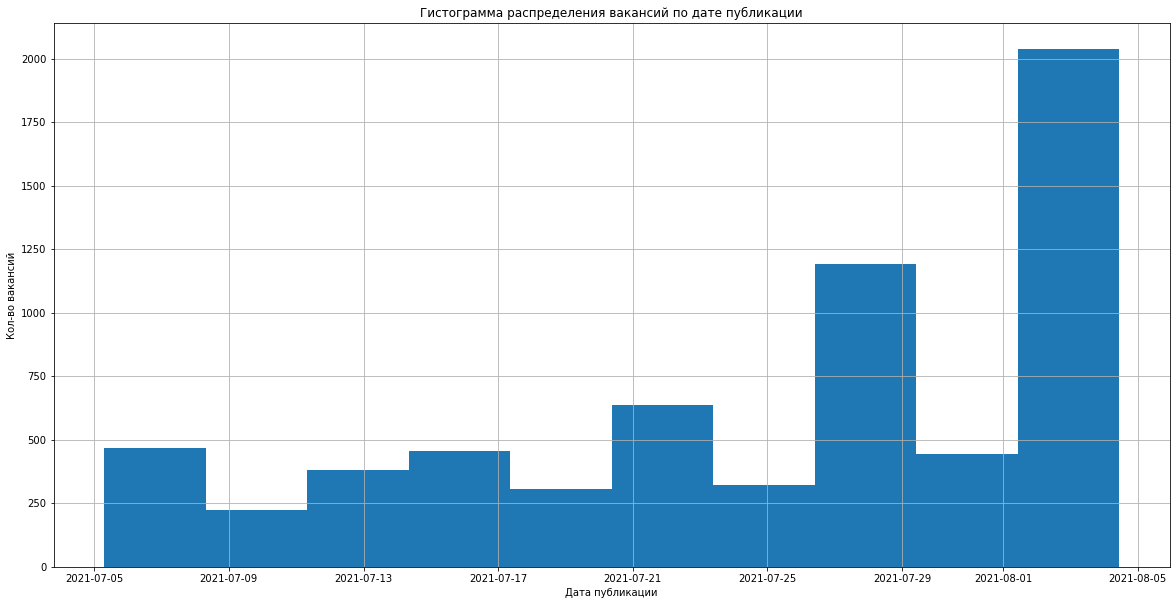

In [57]:
df['published_at'].hist(figsize = [20,10])
plt.title('Гистограмма распределения вакансий по дате публикации')
plt.xlabel('Дата публикации')
plt.ylabel('Кол-во вакансий')
plt.show()

In [ ]:
#в начале августа появилось около 30% от всех выгруженных вакансии.

In [62]:
df['name'] = df.name.str.lower()

In [70]:
vac_for_me = []
for el in df['name'].values:
    if 'data analyst'  in el:
        vac_for_me.append(el)

In [71]:
vac_for_me

['lead data analyst',
 'data analyst (junior|junior+)',
 'аналитик данных (data analyst)',
 'data analyst',
 'data analyst',
 'data analyst (premium solutions)',
 'data analyst',
 'data analyst (cltv)',
 'data analyst (nrt)',
 'data analyst (отдел планирования и отчётности)',
 'data analyst',
 'data analyst',
 'data analyst sberdevices',
 'data analyst',
 'data analyst',
 'senior data analyst в команду lifecycle management',
 'lead data analyst',
 'data analyst',
 'lead data analyst (портфельное управление карточным бизнесом)',
 'data analyst (sberdevices)',
 'data analyst ассистентов салют (sberdevices)',
 'data analyst',
 'data analyst',
 'data analyst (казначейство)',
 'data analyst',
 'data analyst (трансформация инвестиц бизнеса)']

In [75]:
df_vac = df[df['name'].isin(vac_for_me)]
df_vac = df_vac[df_vac['key_skills'] != 'Отсутствует']
df_vac

,id,name,salary,department,description,key_skills,published_at,created_at,published_at_dayofweek
508,44593615,аналитик данных (data analyst),None,"{'id': '3529-3529-prof', 'name': 'Сбер для экс...",Обязанности: -Ad hoc аналитика по запросам; -П...,"[SQL, MS SQL, Анализ данных, Работа с базами д...",2021-08-03 12:01:47,2021-08-03 12:01:47,1
1177,46537286,data analyst,None,"{'id': '3529-3529-prof', 'name': 'Сбер для экс...",Наша команда Data – аналитиков и инженеров зан...,"[Hadoop, Atlassian Jira, SQL, Python, Hive]",2021-07-26 15:45:55,2021-07-26 15:45:55,0
4359,45407522,data analyst sberdevices,None,"{'id': '3529-3529-it', 'name': 'Сбер. IT'}","SberDevices - новое направление компании, кото...","[Python, SQL, Анализ данных]",2021-07-28 07:06:37,2021-07-28 07:06:37,2
4371,44891435,data analyst,None,"{'id': '3529-3529-it', 'name': 'Сбер. IT'}",Задачи: Прикладные задачи по сопровождению ско...,"[SQL, Oracle Pl/SQL, Математический анализ, Ма...",2021-07-21 11:13:06,2021-07-21 11:13:06,2
5811,46537424,data analyst,None,"{'id': '3529-3529-prof', 'name': 'Сбер для экс...",Блок «Розничный бизнес» Сбера расширяет команд...,"[SQL, Английский язык, Teradata, Работа с боль...",2021-07-26 15:55:16,2021-07-26 15:55:16,0
6226,44635448,data analyst ассистентов салют (sberdevices),None,"{'id': '3529-3529-it', 'name': 'Сбер. IT'}",SberDevices – инновационное направление компан...,"[Python, SQL]",2021-07-26 09:54:46,2021-07-26 09:54:46,0
6263,46044958,data analyst,None,"{'id': '3529-3529-prof', 'name': 'Сбер для экс...",Наш проект:SberCIB – инвестиционно-банковское ...,"[Python, SQL, Qlik Sense, Базы данных]",2021-08-03 12:28:55,2021-08-03 12:28:55,1


In [82]:
vac_skills = df_vac['key_skills'].to_list()

In [85]:
skill_list = []
for i in vac_skills:
    skill_list.extend(i)
    

In [91]:
Counter(skill_list)

Counter({'SQL': 7,
         'MS SQL': 1,
         'Анализ данных': 2,
         'Работа с базами данных': 1,
         'Python': 5,
         'Git': 1,
         'Bitbucket': 1,
         'Github': 1,
         'Hadoop': 2,
         'Atlassian Jira': 1,
         'Hive': 1,
         'Oracle Pl/SQL': 1,
         'Математический анализ': 1,
         'Математическая статистика': 1,
         'Базы данных': 2,
         'База данных: Oracle': 1,
         'Постановка задач разработчикам': 1,
         'Бизнес-анализ': 1,
         'Английский язык': 1,
         'Teradata': 1,
         'Работа с большим объемом информации': 1,
         'Qlik Sense': 1})

In [ ]:
#2Два основных скилла для Data-аналитика - это SQL и Python.

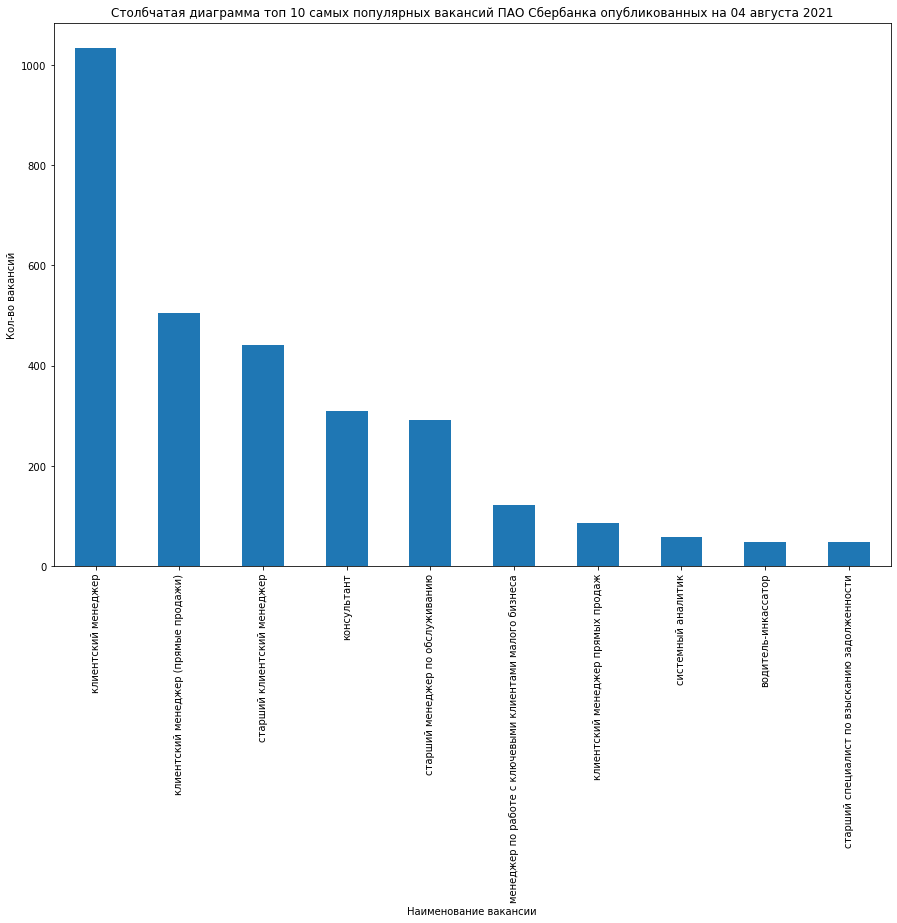

In [93]:
df.groupby('name')['id'].count().sort_values(ascending = False).head(10).plot(kind = 'bar', figsize = [15,10])
plt.title('Столбчатая диаграмма топ 10 самых популярных вакансий ПАО Сбербанка опубликованных на 04 августа 2021')
plt.xlabel('Наименование вакансии')
plt.ylabel('Кол-во вакансий')
plt.show()

In [ ]:
# Фронтлиния постоянно требует подпитки новыми любьми... Предположения есть, но бумага их не стерпит